version 1.0  
## Введение (Introduction)  
Данный блокнот является дополнительным материалом к статье по демонстрации примеров анализа данных и линейной регрессии представленной публикации на портале Habrahabr –  https://habrahabr.ru/post/343216/   
    
Учитывая возможные ошибки вызванные техническими и «человеческими» факторами при обработке данных, рекомендуется применение данного набора исключительно в демонстрационных целях.   
________________________________________________________
This notebook is an additional material to the article on demonstrating examples of data analysis and linear regression.
More detailed on the Habrahabr - https://habrahabr.ru/post/343216/
Materials may contain errors, not recommended for serious research.  
P.S. English text from google translate :)

## Описание данных (Data description)  
    
Данные о работе органов государственной власти г. Москвы с обращениями граждан. Собраны вручную с официального портала Мэра и Правительства Москвы - https://www.mos.ru/feedback/reviews/
num – Индекс записи  
year – год записи  
month – месяц записи  
total_appeals – общее количество обращений за месяц  
appeals_to_mayor – общее количество обращений в адрес Мэра
res_positive- количество положительных решений  
res_explained – количество обращений на которые дали разъяснения  
res_negative – количество обращений с отрицательным решением
El_form_to_mayor – количество обращений к Мэру в электронной форме
Pap_form_to_mayor - – количество обращений к Мэру на бумажных носителях
 to_10K_total_VAO…to_10K_total_YUZAO – количество обращений на 10000 населения в различных округах Москвы
to_10K_mayor_VAO… to_10K_mayor_YUZAO– количество обращений в адрес Мэра и правительства Москвы на 10000 населения в различных округах города 

___
Data on the work with appeals of citizens of the executive power of Moscow. Manually collected from the official portal of the Mayor and the Government of Moscow - https://www.mos.ru/feedback/reviews/
num - Record index  
year is the year of recording  
month - recording month  
total_appeals - total number of hits per month  
appeals_to_mayor - total number of appeals to the Mayor  
res_positive - the number of appeals with positive decisions  
res_explained - the number of appeals that were explained  
res_negative - number of appeals with negative decision  
El_form_to_mayor - the number of appeals to the Mayor in electronic form  
Pap_form_to_mayor - - number of appeals to the Mayor on paper  
 to_10K_total_VAO ... to_10K_total_YUZAO - the number of appeals per 10000 population in various districts of Moscow  
to_10K_mayor_VAO ... to_10K_mayor_YUZAO- the number of appeals to the Mayor and the Government of Moscow for 10,000 people in various districts of the city



Загрузим данные и библиотеки
___
Let's import libriaries and load data

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests, bs4
import time
from  sklearn import model_selection
from  collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
#load data
df = pd.read_csv('msc_appel_data.csv', sep='\t', index_col='num')


## Первый взгляд на данные (First look at the data)

In [3]:
df.head(12)

,year,month,total_appeals,appeals_to_mayor,res_positive,res_explained,res_negative,El_form_to_mayor,Pap_form_to_mayor,to_10K_total_VAO,...,to_10K_total_TiNAO,to_10K_mayor_TiNAO,to_10K_total_CAO,to_10K_mayor_СAO,to_10K_total_YUAO,to_10K_mayor_YUAO,to_10K_total_YUVAO,to_10K_mayor_YUVAO,to_10K_total_YUZAO,to_10K_mayor_YUZAO
num,,,,,,,,,,,,,,,,,,,,,
1,2016,January,79217,22110,26950,42764,6405,19418,2692,44,...,56,22,73,28,35,11,39,12,44,14
2,2016,February,102704,26736,30071,59325,8239,22846,3890,54,...,67,24,94,30,46,13,55,16,59,18
3,2016,March,112527,26972,30820,67568,8435,22250,4722,62,...,72,27,103,33,51,13,58,15,63,18
4,2016,April,121050,30179,31289,75471,8359,26086,4093,67,...,79,35,106,34,54,15,63,17,68,17
5,2016,May,119504,40300,26433,80753,6969,22677,17623,65,...,71,29,122,54,52,18,60,20,70,25
6,2016,June,112513,29752,27410,71508,6435,19125,10627,62,...,67,23,100,34,46,12,56,14,58,15
7,2016,July,99982,23071,25944,62916,5444,19002,4069,58,...,68,28,97,30,45,11,54,13,57,12
8,2016,August,114670,25180,30761,70034,6098,19967,5213,65,...,80,28,105,29,54,12,63,13,65,12
9,2016,September,118274,28483,31365,74577,6019,22237,6246,67,...,72,31,114,33,51,12,70,18,67,15


Посмотрим на корреляцию между некоторыми столбцами, а именно всеми кроме связанных с округами Москвы. Построим  их попарные диаграммы
_____
Let's look at the correlation between some columns, namely all except those connected with the districts of Moscow. We construct their pair diagrams

In [4]:
columns_to_show = ['res_positive', 'res_explained', 'res_negative',
                   'total_appeals', 'appeals_to_mayor','El_form_to_mayor', 'Pap_form_to_mayor']
data=df[columns_to_show]

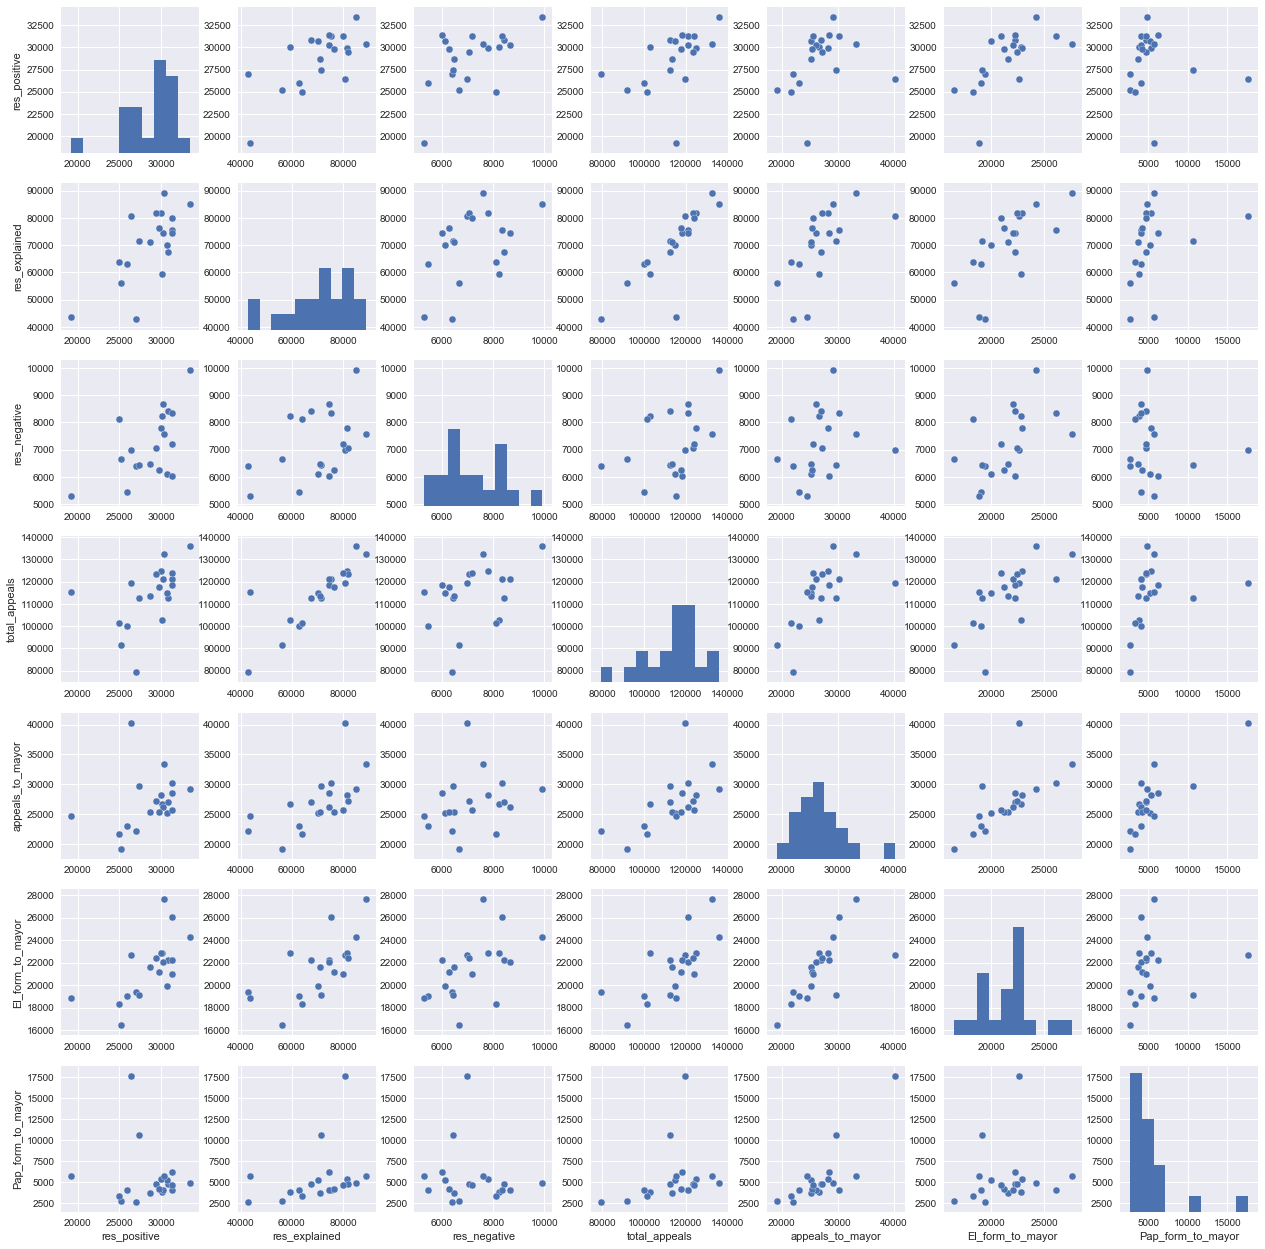

In [5]:
grid = sns.pairplot(df[columns_to_show])
savefig('1.png')


Посмотрим подробней на некоторые комбинации, в которых есть намек на линейную зависимость. Получим количественную оценку в виде коэффициента корреляции Пирсона.
_____
Let's look in more detail at some combinations in which there is a similarity with linear dependence. We obtain a quantitative estimate in the form of a Pearson correlation coefficient.



In [6]:
print("Correlation coefficient for a explained review result to the total number of appeals =",
       df.res_explained.corr(df.total_appeals) )

print("Corr.coeff. for a  total number of appeals to mayor to the total number of appeals to mayor in electronic form =",
       df.appeals_to_mayor.corr(df.El_form_to_mayor) )


Correlation coefficient for a explained review result to the total number of appeals = 0.830749053715
Corr.coeff. for a  total number of appeals to mayor to the total number of appeals to mayor in electronic form = 0.685450192201


С одной стороны, очевидно, что чем больше общее количество обращений или обращений в электронной форме, тем больше всего обращений. С другой стороны, надо отметить, что эта зависимость не полностью линейная и наверняка мы не смогли учесть всего.
___
On the one hand, it is obvious that the greater the total number of appeals or appeals in electronic form. The greater the number of appeals. On the other hand, it should be noted that this dependence is not completely linear and we could not possibly have taken into account everything.


Давайте рассмотрим, еще что-нибудь. Например, найдем округ Москвы, где за год больше всего обращений граждан на 10000 человек населения.
______
Let's look at something else. For example, we will find the district of Moscow, where for the year the most appeals of citizens for 10,000 people.


In [7]:
district_columns = ['to_10K_total_VAO', 'to_10K_total_ZAO', 'to_10K_total_ZelAO',
        'to_10K_total_SAO','to_10K_total_SVAO','to_10K_total_SZAO','to_10K_total_TiNAO','to_10K_total_CAO',
        'to_10K_total_YUAO','to_10K_total_YUVAO','to_10K_total_YUZAO']

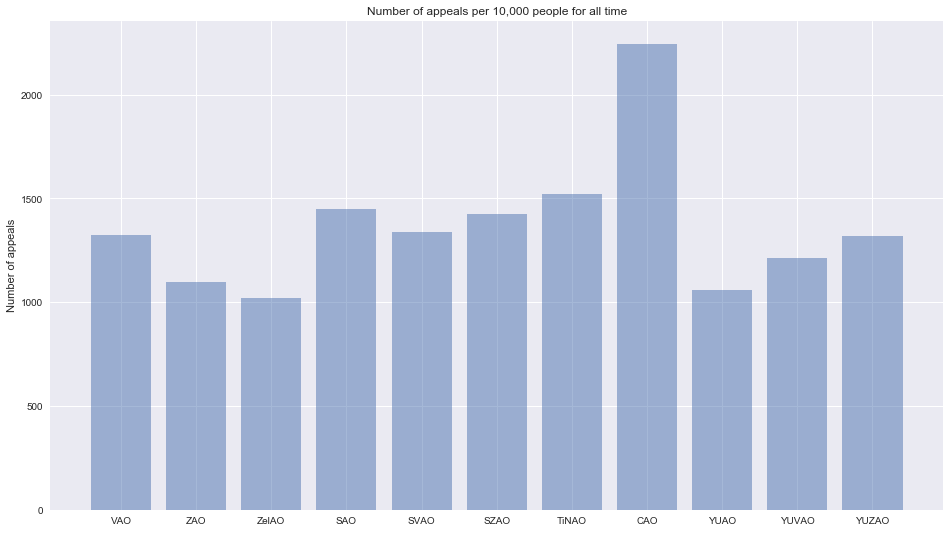

In [8]:
y_pos = np.arange(len(district_columns))

short_district_columns=district_columns.copy()
for i in range(len(short_district_columns)):
    short_district_columns[i] = short_district_columns[i].replace('to_10K_total_','')


distr_sum = df[district_columns].sum()

plt.figure(figsize=(16,9))
plt.bar(y_pos, distr_sum, align='center', alpha=0.5)

plt.xticks(y_pos, short_district_columns)
plt.ylabel('Number of appeals')
plt.title('Number of appeals per 10,000 people for all time')

savefig('2.png')

## Добавим другие данные из сети (Add other data from the network)

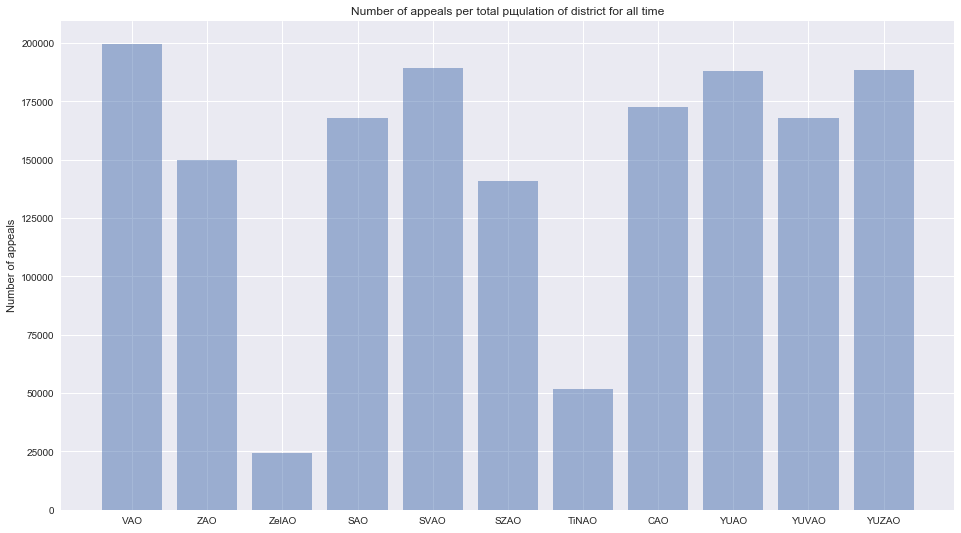

In [9]:
""" To remind
district_columns = ['to_10K_total_VAO', 'to_10K_total_ZAO', 'to_10K_total_ZelAO',
        'to_10K_total_SAO','to_10K_total_SVAO','to_10K_total_SZAO','to_10K_total_TiNAO','to_10K_total_CAO',
        'to_10K_total_YUAO','to_10K_total_YUVAO','to_10K_total_YUZAO']  
"""
# we will collect the data manually from 
# https://ru.wikipedia.org/wiki/%D0%90%D0%B4%D0%BC%D0%B8%D0%BD%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE-%D1%82%D0%B5%D1%80%D1%80%D0%B8%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B

#the data is filled in the same order as the district_columns
district_population=[1507198,1368731,239861,1160576,1415283,990696,339231,769630,1776789,1385385,1427284]

#transition from 1/10000 to citizens' appeal to the entire population of the district
total_appel_dep=district_population*distr_sum/10000

plt.figure(figsize=(16,9))
plt.bar(y_pos, total_appel_dep, align='center', alpha=0.5)
plt.xticks(y_pos, short_district_columns)
plt.ylabel('Number of appeals')
plt.title('Number of appeals per total pщulation of district for all time')

savefig('3.png')

Посмотрим связано ли как-нибудь количество положительных решений по обращениям с ценами на нефть. Соберем данные автоматически напишем простенький сборщик данных с сайта.
____
Let's see whether there is somehow related to the number of positive decisions on the treatment of oil prices. Let's collect the data automatically write a simple data collector from the site.


In [10]:
#we use beautifulsoup

oil_page=requests.get('https://worldtable.info/yekonomika/cena-na-neft-marki-brent-tablica-s-1986-po-20.html')
b=bs4.BeautifulSoup(oil_page.text, "html.parser")
table=b.select('.item-description')
table = b.find('div', {'class': 'item-description'})
table_tr=table.find_all('tr') 

d_parse=OrderedDict()
for tr in table_tr[1:len(table_tr)-1]:
    td=tr.find_all('td')
    d_parse[td[0].get_text()]=float(td[1].get_text())

In [11]:
# dictionary selection boundaries
d_start=358
d_end=378

# Uncomment all if grabber doesn't work
#d_parse=[("январь 2016", 30.8), ("февраль 2016", 33.2), ("март 2016", 39.25), ("апрель 2016", 42.78), ("май 2016", 47.09),
# ("июнь 2016", 49.78), ("июль 2016", 46.63), ("август 2016", 46.37), ("сентябрь 2016", 47.68), ("октябрь 2016", 51.1),
# ("ноябрь 2016", 47.97), ("декабрь 2016", 54.44), ("январь 2017", 55.98), ("февраль 2017", 55.95), ("март 2017", 53.38),
# ("апрель 2017", 53.54), ("май 2017", 50.66), ("июнь 2017", 47.91), ("июль 2017", 49.51), ("август 2017", 51.82)]
#d_parse=dict(d_parse)
#d_start=0
#d_end=20

In [12]:
# values from January 2016 to August 2017
df['oil_price']=list(d_parse.values())[d_start:d_end]
df.tail(5)

,year,month,total_appeals,appeals_to_mayor,res_positive,res_explained,res_negative,El_form_to_mayor,Pap_form_to_mayor,to_10K_total_VAO,...,to_10K_mayor_TiNAO,to_10K_total_CAO,to_10K_mayor_СAO,to_10K_total_YUAO,to_10K_mayor_YUAO,to_10K_total_YUVAO,to_10K_mayor_YUVAO,to_10K_total_YUZAO,to_10K_mayor_YUZAO,oil_price
num,,,,,,,,,,,,,,,,,,,,,
16,2017,April,124645,28222,29975,81685,7797,22879,5343,74,...,27,128,34,61,16,71,18,76,16,53.54
17,2017,May,132311,33344,30373,88947,7589,27621,5723,84,...,28,141,44,62,15,79,24,75,17,50.66
18,2017,June,123521,27173,29427,81738,7049,22410,4763,78,...,26,134,37,56,13,66,78,78,18,47.91
19,2017,July,117468,25336,29803,76352,6256,21174,4162,72,...,51,127,32,55,12,60,14,70,14,49.51
20,2017,August,123718,25633,31333,79803,7191,20977,4655,80,...,51,127,32,55,12,60,14,70,14,51.82


In [13]:
print("Correlation coefficient for the total number of appeals result to the oil price (in US $) =",
       df.total_appeals.corr(df.oil_price) )
print("Correlation coefficient for a positive review result to the oil price (in US $) =",
       df.res_positive.corr(df.oil_price) )

Correlation coefficient for the total number of appeals result to the oil price (in US $) = 0.446035680201
Correlation coefficient for a positive review result to the oil price (in US $) = -0.0530061539779


## Линейная регрессия (Linear regression)

Произведём некоторые манипуляции с исходными данными для того чтобы строить модель линейной регрессии в последующих ячейках
___
Let's make some manipulations with the initial data in order to build a linear regression model in the cells below


In [14]:
df2=df.copy()

#Let's make a separate column for each value of our categorical variable
df2=pd.get_dummies(df2,prefix=['month'])

#Let's code the month with numbers
d={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
month=df.month.map(d)

#We paste the information about the date from several columns
dt=list()
for year,mont in zip(df2.year.values, month.values):
    s=str(year)+' '+str(mont)+' 1'
    dt.append(s)
#convert the received data into the DateTime type and replace them with a column year      
df2.rename(columns={'year': 'DateTime'}, inplace=True)
df2['DateTime']=pd.to_datetime(dt, format='%Y %m %d')

df2.head(5)

,DateTime,total_appeals,appeals_to_mayor,res_positive,res_explained,res_negative,El_form_to_mayor,Pap_form_to_mayor,to_10K_total_VAO,to_10K_mayor_VAO,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
num,,,,,,,,,,,,,,,,,,,,,
1,2016-01-01,79217,22110,26950,42764,6405,19418,2692,44,14,...,0,0,1,0,0,0,0,0,0,0
2,2016-02-01,102704,26736,30071,59325,8239,22846,3890,54,15,...,0,1,0,0,0,0,0,0,0,0
3,2016-03-01,112527,26972,30820,67568,8435,22250,4722,62,16,...,0,0,0,0,0,1,0,0,0,0
4,2016-04-01,121050,30179,31289,75471,8359,26086,4093,67,17,...,0,0,0,0,0,0,0,0,0,0
5,2016-05-01,119504,40300,26433,80753,6969,22677,17623,65,24,...,0,0,0,0,0,0,1,0,0,0


Построим модель на основании большинства столбцов таблицы в качестве признаков, без учета данных о месяцах. Посмотрим, как это поможет нам предсказать, число положительных решений по обращениям граждан.
___
We will construct the model on the basis of the majority of columns of the table as features, without taking the data on the months. Let's see how this will help us predict the number of positive decisions on citizens' appeals.


In [15]:
#Prepare the data

cols_for_regression=columns_to_show+district_columns

cols_for_regression.remove('res_positive')
cols_for_regression.remove('total_appeals')

X=df2[cols_for_regression].values
y=df2['res_positive']

#Scale the data
scaler =StandardScaler()
X_scal=scaler.fit_transform(X)
y_scal=scaler.fit_transform(y)

Мы будем использовать линейную регрессию с регуляризацией Гребень (Ridge). Данные поделим в соотношении 80% к 20 % (обучение / контроль), также будем проверять качество модели с помощью кросс валидации (в данном случае разбиение будет один цикл – один образец). 
___
We will use linear regression with Ridge regularization. The data will be divided in the ratio of 80% to 20% (train/ test), and we will also check the quality of the model using cross validation (in this case, the split will be one cycle - one sample).


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scal, y_scal, test_size=0.2, random_state=42)
#y_train=np.reshape(y_train,[y_train.shape[0],1])
#y_test=np.reshape(y_test,[y_test.shape[0],1])

loo = model_selection.LeaveOneOut()

#alpha coefficient is taken  at a rough guess

lr = linear_model.Ridge(alpha=55.0)
scores = model_selection.cross_val_score(lr , X_train, y_train, scoring='mean_squared_error', cv=loo,)
print('CV Score:', scores.mean())

lr .fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Test Score:', lr.score(X_test,y_test))

CV Score: -0.862647707895
Coefficients: [ 0.10473057  0.08121859  0.00540471  0.06896755 -0.04812318  0.04166228
  0.0572629  -0.01035959  0.09634643  0.07031471 -0.02657464  0.02800165
  0.03528063  0.02458972  0.06148957  0.04026195]
Test Score: -0.814435440002


Посмотрим, как влияет цена на нефть на качество предсказания.
___
Let's see how the price of oil affects the quality of the prediction.

In [17]:
X_oil=df2[cols_for_regression+['oil_price']].values
y_oil=df2['res_positive']
scaler =StandardScaler()
X_scal_oil=scaler.fit_transform(X_oil)
y_scal_oil=scaler.fit_transform(y_oil)

X_train, X_test, y_train, y_test = train_test_split(X_scal_oil, y_scal_oil, test_size=0.2, random_state=42)
#y_train=np.reshape(y_train,[y_train.shape[0],1])
#y_test=np.reshape(y_test,[y_test.shape[0],1])
lr = linear_model.Ridge()

loo = model_selection.LeaveOneOut()
lr = linear_model.Ridge(alpha=55.0)
scores = model_selection.cross_val_score(lr , X_train, y_train, scoring='mean_squared_error', cv=loo,)
print('CV Score:', scores.mean())

lr .fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Test Score:', lr.score(X_test,y_test))

CV Score: -0.863699353968
Coefficients: [ 0.10502651  0.0819168   0.00415511  0.06749919 -0.04864709  0.04241101
  0.05686368 -0.00928224  0.09569626  0.0708282  -0.02600053  0.02783746
  0.0360866   0.02536353  0.06146142  0.04065484 -0.02887498]
Test Score: -0.506208294281


predict: [-1.22036553  0.39006382  0.46499326 -0.27854243] 
real: [-0.5543026   0.23746693  0.41263435  0.44332061] 


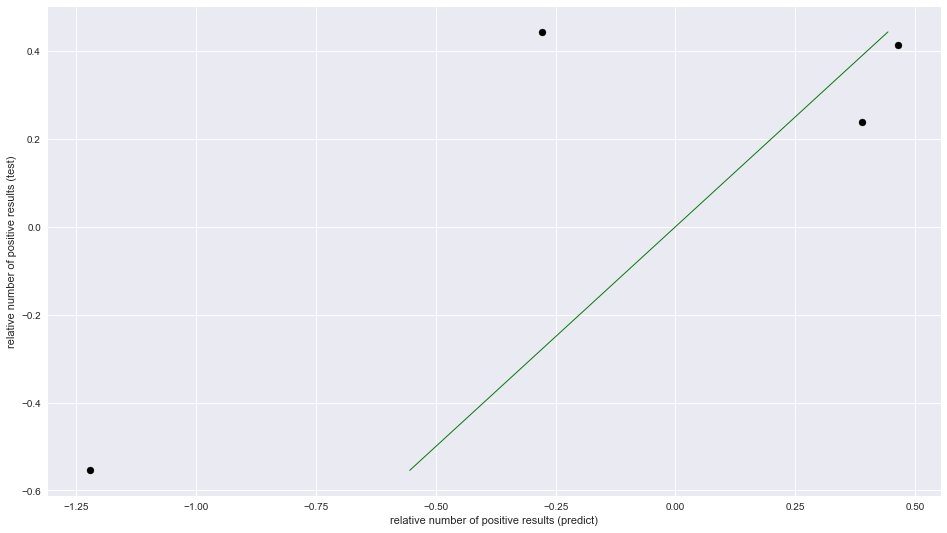

In [18]:
# plot for test data
plt.figure(figsize=(16,9))

plt.scatter(lr.predict(X_test), y_test,  color='black')
plt.plot(y_test, y_test, '-', color='green',
         linewidth=1)


plt.xlabel('relative number of positive results (predict)')
plt.ylabel('relative number of positive results (test)')
plt.title="Regression on test data"

print('predict: {0} '.format(lr.predict(X_test)))
print('real: {0} '.format(y_test))

savefig('4.png')

При идеально точном предсказании, все 4 точки должны были бы располагаться на линии.
____
With an ideally accurate prediction, all 4 points would have to be on the line.

## Временной ряд (Time series)

До этого мы брали случайные точки дал контроля предсказания.
Давайте теперь рассмотрим тоже самое, но в контексте временного тренда.
Будем предсказывать количество положительных решений в «будущем».
___
Previously, we took random points to give control of the prediction.
Let's now consider the same thing, but in the context of the trend.
We will predict the number of positive decisions in the "future".


Для начала посмотрим на нашу прошлую модель с ценами на нефть.
___
First, look at our past model with oil prices.

CV Score: -0.989644199134
Coefficients: [ 0.29502827  0.18625818 -0.05782895  0.14304852 -0.19414197  0.00671457
  0.00761346 -0.09589469  0.23355104  0.1795458  -0.08298576 -0.09204623
  0.00742492 -0.03964034  0.13593245 -0.00747192 -0.18743228]
Test Score: -4.31744509658
predict: [ 1.40179872  0.5677182   0.1258284   0.38227278] 
real: [ 0.53985448  0.23746693  0.35765479  0.84671711] 


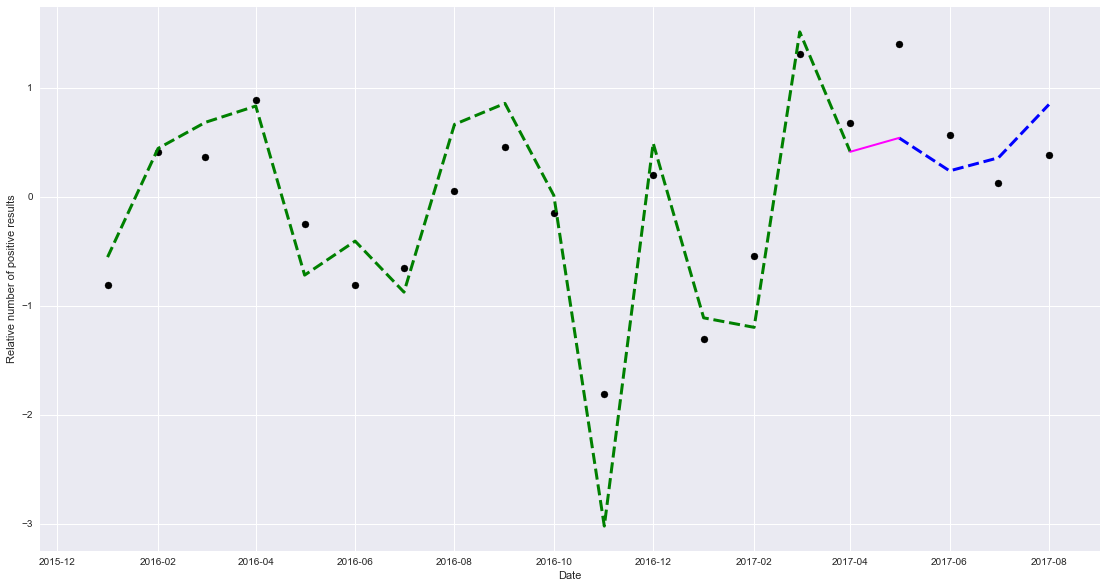

In [19]:
X_train=X_scal_oil[0:16]
X_test=X_scal_oil[16:20]
y_train=y_scal_oil[0:16]
y_test=y_scal_oil[16:20]

loo = model_selection.LeaveOneOut()
lr = linear_model.Ridge(alpha=7.0)
scores = model_selection.cross_val_score(lr , X_train, y_train, scoring='mean_squared_error', cv=loo,)
print('CV Score:', scores.mean())

lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Test Score:', lr.score(X_test,y_test))


# plot for test data
plt.figure(figsize=(19,10))

#trainline
plt.scatter(df2.DateTime.values[0:16], lr.predict(X_train),  color='black')
plt.plot(df2.DateTime.values[0:16], y_train, '--', color='green',
         linewidth=3)

#test line
plt.scatter(df2.DateTime.values[16:20], lr.predict(X_test),  color='black')
plt.plot(df2.DateTime.values[16:20], y_test, '--', color='blue',
         linewidth=3)

#connecting line
plt.plot([df2.DateTime.values[15],df2.DateTime.values[16]],  [y_train[15],y_test[0]] , 
         color='magenta',linewidth=2, label='train to test')

plt.xlabel('Date')
plt.ylabel('Relative number of positive results')
plt.title="Time series"

print('predict: {0} '.format(lr.predict(X_test)))
print('real: {0} '.format(y_test))

savefig('5.1.png')

Уберем цены на нефть, зато добавим закодированные данные о месяцах.
___
We remove oil prices, but we add coded data about the months.

CV Score: -0.909527242059
Coefficients: [ 0.09886191  0.11920832  0.02519177  0.20624114 -0.13140361 -0.02511699
  0.0580594  -0.12742719  0.13987627  0.07905998 -0.08918158  0.00626676
 -0.00090422 -0.01557178  0.0838269   0.00827684  0.04305265 -0.05808898
  0.01884837 -0.06313912  0.04531003  0.1165687  -0.13590156 -0.29777529
  0.03542855  0.12639045 -0.00721213  0.15110762]
Test Score: -0.35070187517
predict: [ 0.71512724  0.37641552 -0.10881606  0.71539711] 
real: [ 0.53985448  0.23746693  0.35765479  0.84671711] 


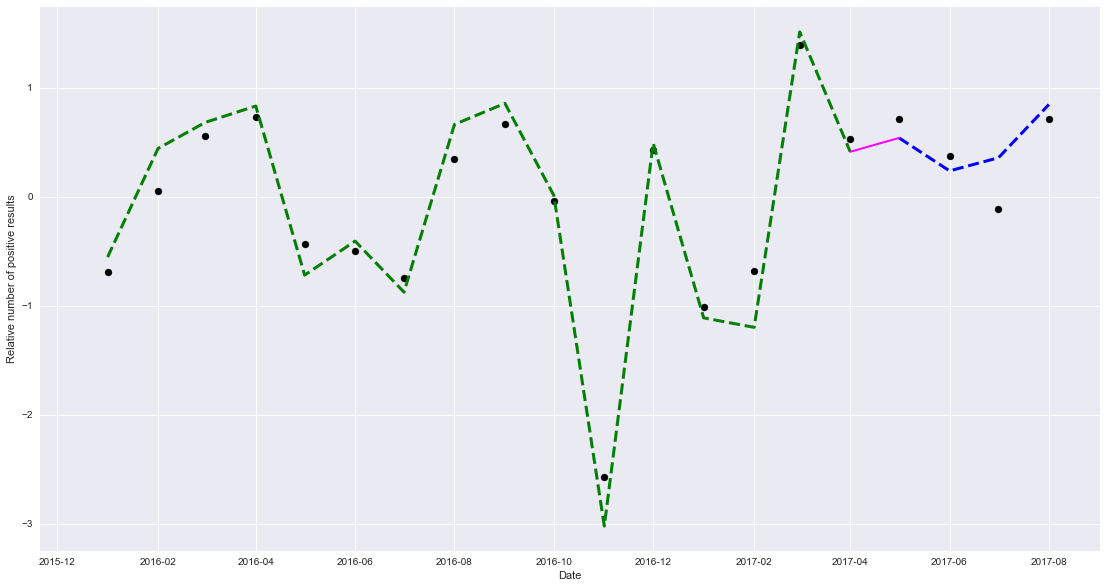

In [21]:
cols_months=['month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November',
'month_October','month_September','month_April','month_August']

X_month=df2[cols_for_regression+cols_months].values
y_month=df2['res_positive']
scaler =StandardScaler()
X_scal_month=scaler.fit_transform(X_month)
y_scal_month=scaler.fit_transform(y_month)


X_train=X_scal_month[0:16]
X_test=X_scal_month[16:20]
y_train=y_scal_month[0:16]
y_test=y_scal_month[16:20]


loo = model_selection.LeaveOneOut()
lr = linear_model.Ridge(alpha=7.0)
scores = model_selection.cross_val_score(lr , X_train, y_train, scoring='mean_squared_error', cv=loo,)
print('CV Score:', scores.mean())

lr.fit(X_train, y_train)
print('Coefficients:', lr.coef_)
print('Test Score:', lr.score(X_test,y_test))


# plot for test data
plt.figure(figsize=(19,10))

#trainline
plt.scatter(df2.DateTime.values[0:16], lr.predict(X_train),  color='black')
plt.plot(df2.DateTime.values[0:16], y_train, '--', color='green',
         linewidth=3)
#test line
plt.scatter(df2.DateTime.values[16:20], lr.predict(X_test),  color='black')
plt.plot(df2.DateTime.values[16:20], y_test, '--', color='blue',
         linewidth=3)
#connecting line
plt.plot([df2.DateTime.values[15],df2.DateTime.values[16]],  [y_train[15],y_test[0]] , color='magenta',linewidth=2, label='train to test')

plt.xlabel('Date')
plt.ylabel('Relative number of positive results')
plt.title="Time series"

print('predict: {0} '.format(lr.predict(X_test)))
print('real: {0} '.format(y_test))

savefig('5.2.png')

Возможно вы сможете применить библиотеку  Statsmodels (http://www.statsmodels.org/stable/index.html), для анализа временного тренда, но мне кажется на данный момент данных для хорошего анализа немного недостаточно.
___
Perhaps you can use the Statsmodels library (http://www.statsmodels.org/stable/index.html) to analyze the time trend, but it seems to me that at the moment the data for a good analysis is not enough.